<a href="https://colab.research.google.com/github/MNasirSheikh/ISYS5002-2023-Semester1/blob/main/Copy_of_05_3_stocks_daily_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module CSV

### Reading and Writing CSV file

Text files work fine when we are referencing small amounts of information, but when we use larger amounts of data, adding structure helps in organizing and retrieving values. 

One common format found in business and social sciences alike (as well as any field concerned with data science) is the comma-separated values (CSV) format. 

**CSV files** are the most common format used for importing and exporting data from spreadsheets and databases. 

CSV files are text files that have delimiters.  A **delimiter** is a character that separates data values. 

You can explore CSV files in spreadsheet software (such as Microsoft Excel), which will remove delimiters (usually commas) and store data values in separate cells.


One of the benefits of importing data files such as CSV files is the ability to read in a lot of data at once, parsing the data so your code can access individual values within the data. **By default, CSV files use commas (“,”) to separate data values**.



**csv module** provides functions for working with CSV files

In [ ]:
#Writing to a CSV file

#import csv module
import csv

#open file and write records
with open("accounts.csv", 'w')  as accounts:
  writer = csv.writer(accounts)
  writer.writerow([100, 'Jones', 24.98])
  writer.writerow([200, 'Doe', 345.67])
  writer.writerow([300, 'Williams', 0.00])
  writer.writerow([400, 'Stone', -42.16])
  writer.writerow([500, 'Rich', 224.62])


In [ ]:
#reading from CSV file
#The csv module’s reader function returns an object that reads CSV-format data from the specified file object

#open file and read records
import csv

#open file and write records
with open("accounts.csv", 'r')  as accounts:
  reader = csv.reader(accounts)
  print(f'{"Accounts":10}{"Name":10}{"Balance":8}')
  for record in reader:
    accountid, name, balance = record
    #print(record)
    #print(accountid, name, balance)
    print(f'{accountid:10}{name:10}{balance:8}')


Accounts  Name      Balance 
100       Jones     24.98   
200       Doe       345.67  
300       Williams  0.0     
400       Stone     -42.16  
500       Rich      224.62  


## Working with large CSV file

In [5]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1653004800&period2=1661040000&interval=1d&events=history&includeAdjustedClose=true" > NABData.csv

#Curl functions is used to have this data from the website (you just copy past the donwload link address and using !curl function paste it and yes
  #to presenrt it in a format manner you can use " NABDATA.csv" why using csv is to specify the file data and in a format also can use it BHP.csv) but after using ">" after the link address.
  #it will create a csv file in it and you can download it as well.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4531  100  4531    0     0  41568      0 --:--:-- --:--:-- --:--:-- 41953


In [6]:
import csv

#open file and write records
with open("NABData.csv", 'r')  as data:
  reader = csv.reader(data)
  print(next(reader))
  print(next(reader))
  print(next(reader))


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2022-05-20', '30.780001', '31.139999', '30.750000', '31.070000', '30.294741', '5341969']
['2022-05-23', '31.070000', '31.150000', '30.735001', '30.780001', '30.011978', '4079073']


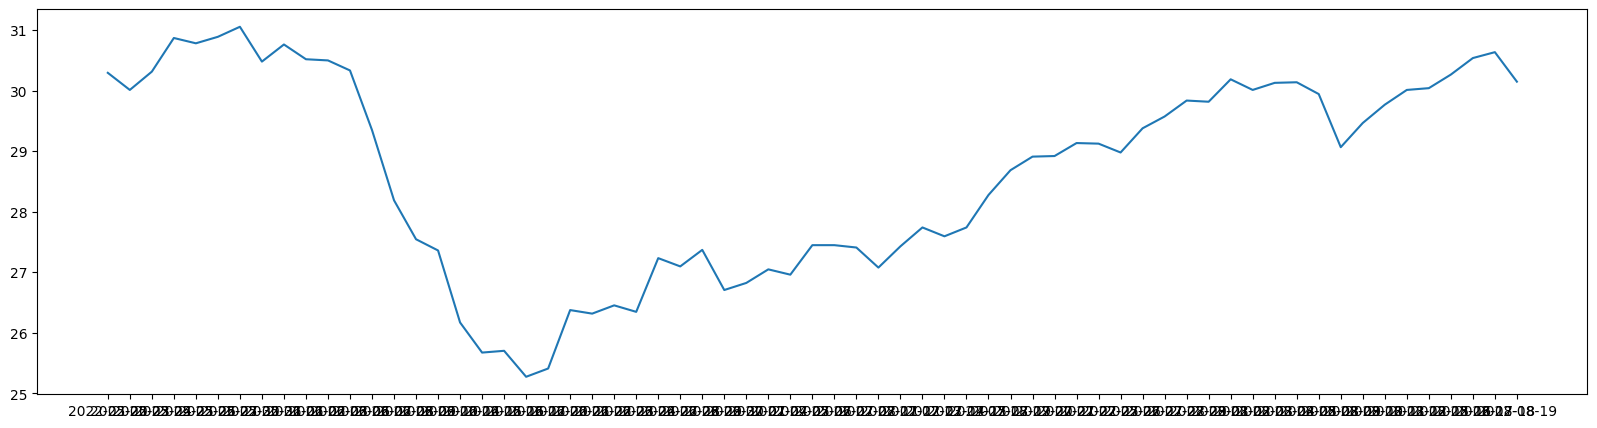

In [7]:
import csv

date = []
close = []
c = 0
#open file and write records
with open("NABData.csv", 'r')  as data:
  reader = csv.reader(data)
  header = next(reader, None) #get the headers
  #print(header)
  for record in reader:
    date.append(record[0])
    close.append(float(record[5]))

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(date, close)


In [8]:
#1-Nasir's Practise Code.
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP.AX?period1=1649798542&period2=1681334542&interval=1d&events=history&includeAdjustedClose=true">BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17399    0 17399    0     0   141k      0 --:--:-- --:--:-- --:--:--  141k


In [9]:
#2- Nasir's Practise Code.
import csv

#open file and write records
with open("BHPData.csv", 'r')  as data:
  reader = csv.reader(data)
  print(next(reader))
  print(next(reader))
  print(next(reader))

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2022-04-13', '51.849998', '52.029999', '51.470001', '51.779999', '47.136189', '7602532']
['2022-04-14', '52.200001', '52.610001', '52.080002', '52.500000', '47.791618', '8994800']


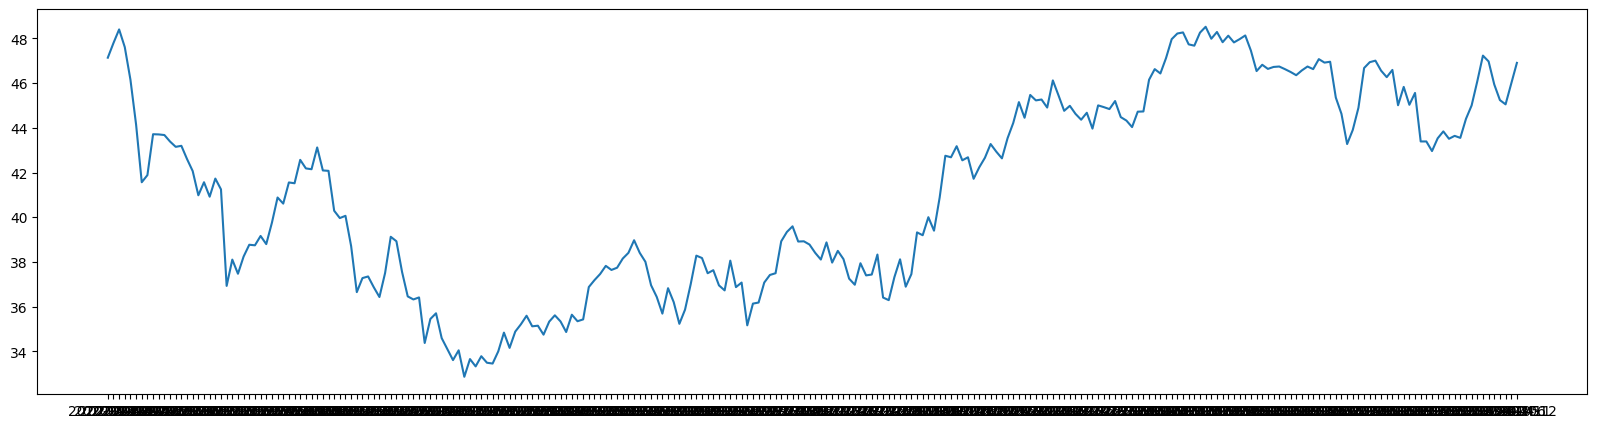

In [10]:
#3- Nasir's Practise Code.
import csv

date = []
close = []
c = 0
#open file and write records
with open("BHPData.csv", 'r')  as data:
  reader = csv.reader(data)
  header = next(reader, None) #get the headers
  #print(header)
  for record in reader:
    date.append(record[0])
    close.append(float(record[5]))

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(date, close)

# Module Pandas

## Using Pandas Module to Read in CSV Files (the “Easy Way”)

An easier method of importing files into Python is using the **Pandas** module. Pandas (name derived from “panel data”) is a data analysis library that, among other things, makes reading in CSV files and accessing the contained data much easier 

The primary data structure used in Pandas are a ***DataFrame***. A DataFrame has a *two-dimensional tabular format using rows and columns*. Using a DataFrame, we can reference columns by name, rather than having to count to figure out which column number we want. Pandas provides an assortment of methods like .mean() that will do summary statistics on our data

 
Read From a CSV File Using Pandas

Source: *Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

In [11]:
#1-Nasir's Practise Code.
import pandas as pnd

In [12]:
#2- Nasir's Practise Code.
pnd.read_csv("BHPData.csv")      

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-13,51.849998,52.029999,51.470001,51.779999,47.136189,7602532
1,2022-04-14,52.200001,52.610001,52.080002,52.500000,47.791618,8994800
2,2022-04-19,53.180000,53.720001,53.060001,53.169998,48.401527,8285661
3,2022-04-20,53.029999,53.099998,52.299999,52.299999,47.609554,8897006
4,2022-04-21,51.389999,51.590000,50.700001,50.700001,46.153046,13882138
...,...,...,...,...,...,...,...
245,2023-04-04,46.549999,46.570000,45.889999,45.939999,45.939999,8571794
246,2023-04-05,45.049999,45.330002,44.930000,45.240002,45.240002,6957691
247,2023-04-06,45.099998,45.355000,44.919998,45.049999,45.049999,5314949
248,2023-04-11,45.549999,46.040001,45.480000,45.980000,45.980000,7264777


In [13]:
#3- Nasir's Practise Code.
df = pnd.read_csv("BHPData.csv")      #using data frame (df) as variable to take it into variable.

In [14]:
# 4- Nasir's Practise Code.    #(here we can play with data as we aready assign to a variable)
df.head
df.tail

<bound method NDFrame.tail of            Date       Open       High        Low      Close  Adj Close  \
0    2022-04-13  51.849998  52.029999  51.470001  51.779999  47.136189   
1    2022-04-14  52.200001  52.610001  52.080002  52.500000  47.791618   
2    2022-04-19  53.180000  53.720001  53.060001  53.169998  48.401527   
3    2022-04-20  53.029999  53.099998  52.299999  52.299999  47.609554   
4    2022-04-21  51.389999  51.590000  50.700001  50.700001  46.153046   
..          ...        ...        ...        ...        ...        ...   
245  2023-04-04  46.549999  46.570000  45.889999  45.939999  45.939999   
246  2023-04-05  45.049999  45.330002  44.930000  45.240002  45.240002   
247  2023-04-06  45.099998  45.355000  44.919998  45.049999  45.049999   
248  2023-04-11  45.549999  46.040001  45.480000  45.980000  45.980000   
249  2023-04-12  46.959999  47.400002  46.770000  46.904999  46.904999   

       Volume  
0     7602532  
1     8994800  
2     8285661  
3     8897006  
4

In [15]:
#5- Nasir's Practise Code
df.info()          #what type of data you're working using this to findout.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [16]:
#6- Nasir Practise Code.
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0    2022-04-13  51.849998  52.029999  51.470001  51.779999  47.136189   
1    2022-04-14  52.200001  52.610001  52.080002  52.500000  47.791618   
2    2022-04-19  53.180000  53.720001  53.060001  53.169998  48.401527   
3    2022-04-20  53.029999  53.099998  52.299999  52.299999  47.609554   
4    2022-04-21  51.389999  51.590000  50.700001  50.700001  46.153046   
..          ...        ...        ...        ...        ...        ...   
245  2023-04-04  46.549999  46.570000  45.889999  45.939999  45.939999   
246  2023-04-05  45.049999  45.330002  44.930000  45.240002  45.240002   
247  2023-04-06  45.099998  45.355000  44.919998  45.049999  45.049999   
248  2023-04-11  45.549999  46.040001  45.480000  45.980000  45.980000   
249  2023-04-12  46.959999  47.400002  46.770000  46.904999  46.904999   

       Volume  
0     7602532  
1     8994800  
2     8285661  
3     8897006  
4    13882138  
..        ...  

In [24]:
#7- Nasir's Practise Code
df.drop(61)    #using to drop 61 rows in the data sets to eliminate the null values to make the data more refined.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-13,51.849998,52.029999,51.470001,51.779999,47.136189,7602532
1,2022-04-14,52.200001,52.610001,52.080002,52.500000,47.791618,8994800
2,2022-04-19,53.180000,53.720001,53.060001,53.169998,48.401527,8285661
3,2022-04-20,53.029999,53.099998,52.299999,52.299999,47.609554,8897006
4,2022-04-21,51.389999,51.590000,50.700001,50.700001,46.153046,13882138
...,...,...,...,...,...,...,...
245,2023-04-04,46.549999,46.570000,45.889999,45.939999,45.939999,8571794
246,2023-04-05,45.049999,45.330002,44.930000,45.240002,45.240002,6957691
247,2023-04-06,45.099998,45.355000,44.919998,45.049999,45.049999,5314949
248,2023-04-11,45.549999,46.040001,45.480000,45.980000,45.980000,7264777


In [23]:
#8- Nasir's Code
df.describe()    #to describe the data in foramt you want to know. (now there's no null values in this data set)

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,43.360087,43.733957,42.991826,43.346451,41.219364,1.007258e+07
std,4.099614,4.085402,4.102762,4.107884,4.404865,3.561059e+06
min,36.000000,36.220001,35.830002,36.099998,32.862427,3.886208e+06
25%,39.432499,39.724999,39.044999,39.262500,37.402612,7.754679e+06
50%,43.735000,44.065000,43.402501,43.865000,41.565052,9.246572e+06
75%,46.587498,46.927501,46.200001,46.552501,45.024999,1.164512e+07
max,53.180000,53.720001,53.060001,53.169998,48.519943,2.670439e+07


In [25]:
#9= Nasir's code
df['Adj Close']      #this is to get the adj close columns values, so in this way you can manupilate the data as the way you want.

0      47.136189
1      47.791618
2      48.401527
3      47.609554
4      46.153046
         ...    
245    45.939999
246    45.240002
247    45.049999
248    45.980000
249    46.904999
Name: Adj Close, Length: 250, dtype: float64

In [31]:
#10- Nasir's Code
df[['Date','Adj Close']]

,Date,Adj Close
0,2022-04-13,47.136189
1,2022-04-14,47.791618
2,2022-04-19,48.401531
3,2022-04-20,47.609554
4,2022-04-21,46.153049
...,...,...
245,2023-04-04,45.939999
246,2023-04-05,45.240002
247,2023-04-06,45.049999
248,2023-04-11,45.980000


         Date       Open       High        Low      Close  Adj Close    Volume
0  2022-04-13  51.849998  52.029999  51.470001  51.779999  47.136189   7602532
1  2022-04-14  52.200001  52.610001  52.080002  52.500000  47.791618   8994800
2  2022-04-19  53.180000  53.720001  53.060001  53.169998  48.401531   8285661
3  2022-04-20  53.029999  53.099998  52.299999  52.299999  47.609554   8897006
4  2022-04-21  51.389999  51.590000  50.700001  50.700001  46.153049  13882138
         Date  Adj Close
0  2022-04-13  47.136189
1  2022-04-14  47.791618
2  2022-04-19  48.401531
3  2022-04-20  47.609554
4  2022-04-21  46.153049


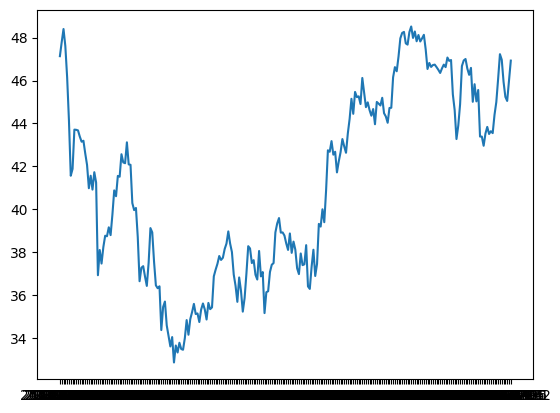

In [32]:
#11- Nasir Code.
#import pandas module
import pandas as pnd  #here I am using pnd as module name
from matplotlib import pyplot as plt

# Load the data
data = pnd.read_csv('BHPData.csv')
print(data.head())

df = data[['Date', 'Adj Close']]
print(df.head())

plt.plot(data['Date'], data['Adj Close'])

In [28]:
#Here we are going to use Pandas Module for plotting the graph.
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP.AX?period1=1649798542&period2=1681334542&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17399    0 17399    0     0   125k      0 --:--:-- --:--:-- --:--:--  125k


         Date       Open       High        Low      Close  Adj Close    Volume
0  2022-04-13  51.849998  52.029999  51.470001  51.779999  47.136189   7602532
1  2022-04-14  52.200001  52.610001  52.080002  52.500000  47.791618   8994800
2  2022-04-19  53.180000  53.720001  53.060001  53.169998  48.401531   8285661
3  2022-04-20  53.029999  53.099998  52.299999  52.299999  47.609554   8897006
4  2022-04-21  51.389999  51.590000  50.700001  50.700001  46.153049  13882138
         Date  Adj Close
0  2022-04-13  47.136189
1  2022-04-14  47.791618
2  2022-04-19  48.401531
3  2022-04-20  47.609554
4  2022-04-21  46.153049


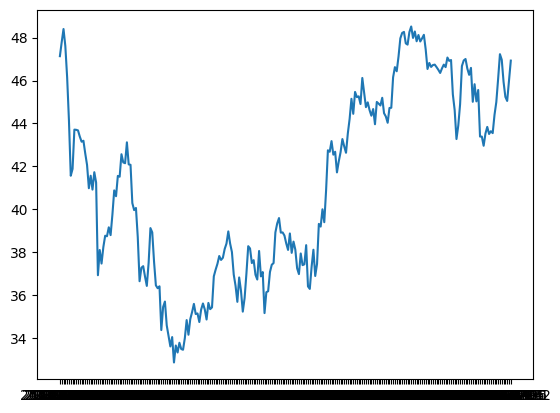

In [29]:
#import pandas module
import pandas as pnd  #here I am using pnd as module name
from matplotlib import pyplot as plt

# Load the data
data = pnd.read_csv('BHPData.csv')
print(data.head())

df = data[['Date', 'Adj Close']]
print(df.head())

plt.plot(data['Date'], data['Adj Close'])


## Daily Return of Stock Data

### Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol. Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price



To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  Now paste to the URL assignment statement.

Sources:

*Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

*Tony Gaddis, Starting out with Python, 5th Edition*

*Deitel & Deitel, Intro to Python for Computer Science and Data Science, Global Edition*
